# Results Reproduction
This notebook reproduces the final results table and figure used in the written publication.

It is intended to provide exact reproducibility of the statistical tests performed. To understand the exact implementation of the statistical tests, see [stats_tests.py](https://github.com/orion-junkins/eeg-connectivity/blob/main/stats_tests.py).


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/orion-junkins/eeg-connectivity/blob/main/results_reproduction.ipynb)

## 0) Setup
Import needed files and perform necessary setup. Check if we are in Google Colab and clone the repository if so. Define needed root directory filepath for accessing the data.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from collections import defaultdict


# Check if the notebook is running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    root_dir = f"/content/eeg-connectivity"
except ImportError:
    IN_COLAB = False
    root_dir = "."

# Clone the repository if in Colab
if IN_COLAB:
    !pip install pingouin==0.5.5 # Install needed stats library
    !git clone https://github.com/orion-junkins/eeg-connectivity.git # Clone repo
    if os.path.exists(root_dir):
        sys.path.append(root_dir) # Add cloned repo to Python path in colab
        print(f"Cloned connectivity repository and added to Python import path.")
    else:
        print(f"Failed to clone repository.")    
else:
    print("Not running in Google Colab. Skipping repository cloning.")

Not running in Google Colab. Skipping repository cloning.


In [2]:
from plotting_utils import plot_heatmap, plot_stacked_triple_ps, plot_connectivity, dict_to_latex_table
from stats_tests import run_mixed_anova
from dataset import Dataset

## 1) Load the Dataset
See [extension_tutorial.ipynb](https://github.com/orion-junkins/eeg-connectivity/blob/main/extension_tutorial.ipynb) for more information on how to use the `Dataset` class.

In [3]:
# Load the dataset with all data in the folder "connectivity_scores_shannon_entropy"
data_dir = os.path.join(root_dir, "data")
dataset = Dataset('connectivity_scores_entropy_5s', expert_excludes=["11, 13b", "1"], novice_excludes=["13", "6", "14"], entropy_analysis=True, data_dir=data_dir)
frequency_bands = ["delta", "theta", "low alpha", "high alpha", "low beta", "high beta"]

## 2) Check for Significant p-values Across All Frequency Bands
Iterate through all six frequency bands and run mixed ANOVA for all electrode pairs. 

Store all group, condition, and interaction p-values.

Plot all p-values.

Start with just baseline data without FDR correction:

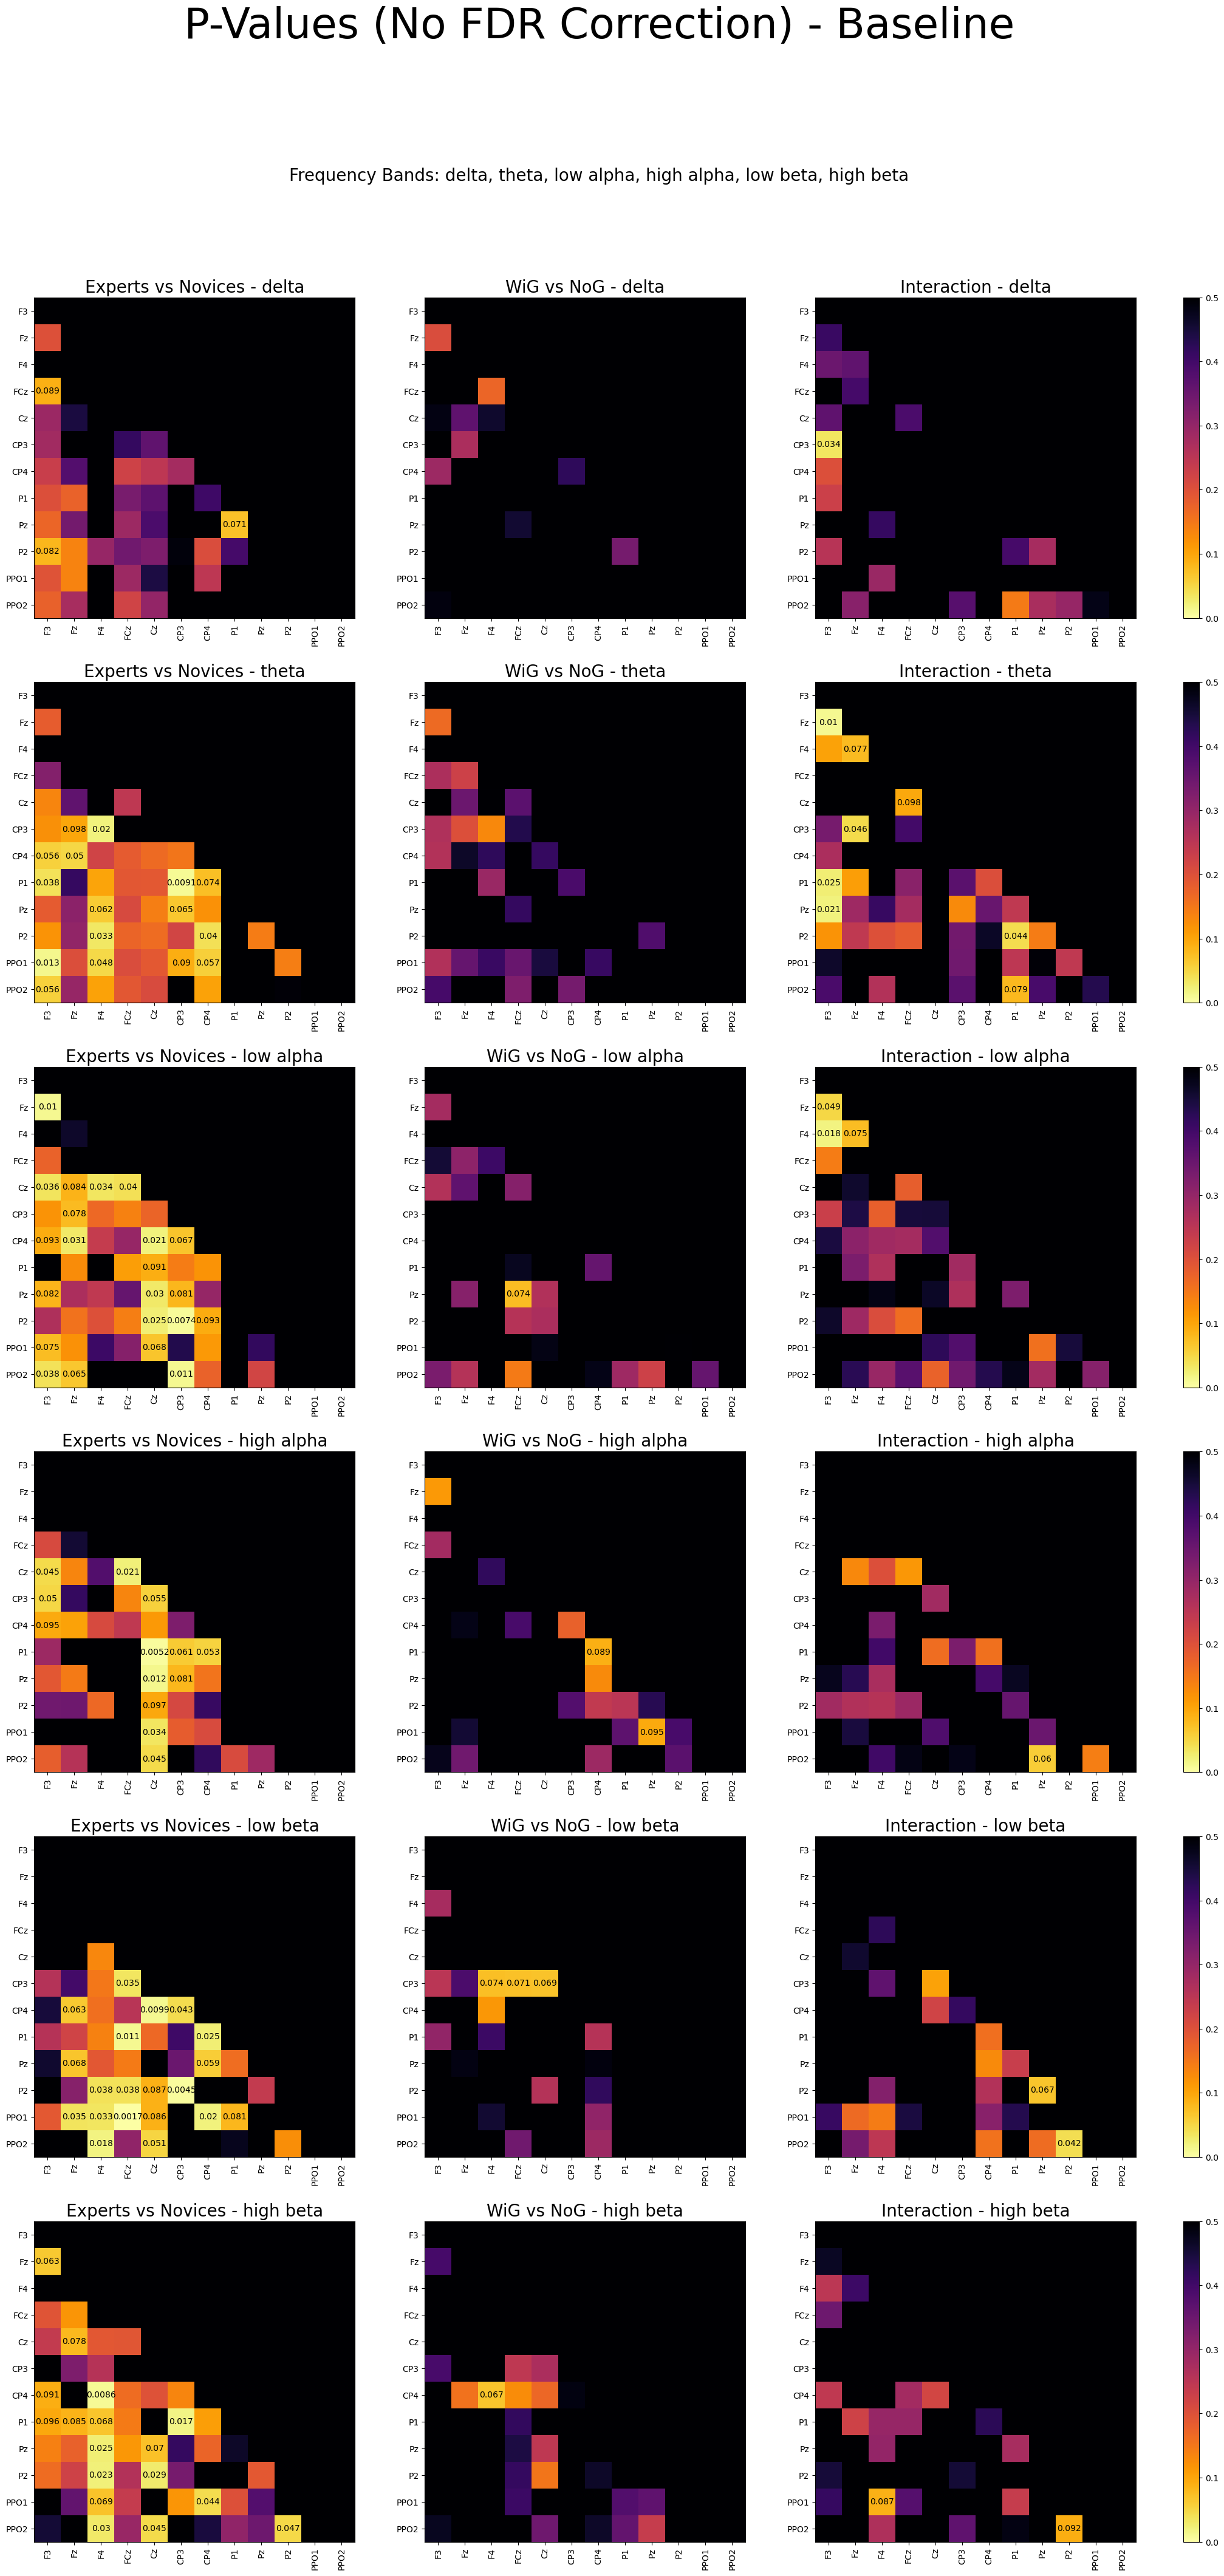

In [4]:
# Store lists of p-values with one entry for each frequency band
bl_group_ps_no_fdr_corr = []
bl_condition_ps_no_fdr_corr = []
bl_interaction_ps_no_fdr_corr = []
bl_n2_condition = []

# Iterate through bl frequency bands and run ANOVA tests for each
for freq in frequency_bands:
    # Define Group A as experts and Group B as novices
    # Define Condition 1 as WiG and Condition 2 as NoG
    group_a_condition_1 = dataset.get_frequency_average("expert", "BL", "WiG", freq)
    group_a_condition_2 = dataset.get_frequency_average("expert", "BL", "NoG", freq)

    group_b_condition_1 = dataset.get_frequency_average("novice", "BL", "WiG", freq)
    group_b_condition_2 = dataset.get_frequency_average("novice", "BL", "NoG", freq)

    # Run FDR Corrected Mixed ANOVA test
    p_values_group, p_values_condition, p_values_interaction, n2_condition = run_mixed_anova(group_a_condition_1, group_a_condition_2, group_b_condition_1, group_b_condition_2, fdr_correct=False)

    # Store p-values
    bl_group_ps_no_fdr_corr.append(p_values_group)
    bl_condition_ps_no_fdr_corr.append(p_values_condition)
    bl_interaction_ps_no_fdr_corr.append(p_values_interaction)

    # Store effect size for condition
    bl_n2_condition.append(n2_condition)


# Plot p-values fro group, condition, and interaction across all frequency bands
plot_stacked_triple_ps(bl_group_ps_no_fdr_corr, bl_condition_ps_no_fdr_corr, bl_interaction_ps_no_fdr_corr, frequency_bands, dataset.electrode_names, title="P-Values (No FDR Correction) - Baseline", sub_title_1="Experts vs Novices", sub_title_2="WiG vs NoG", sub_title_3="Interaction", save_path=None)

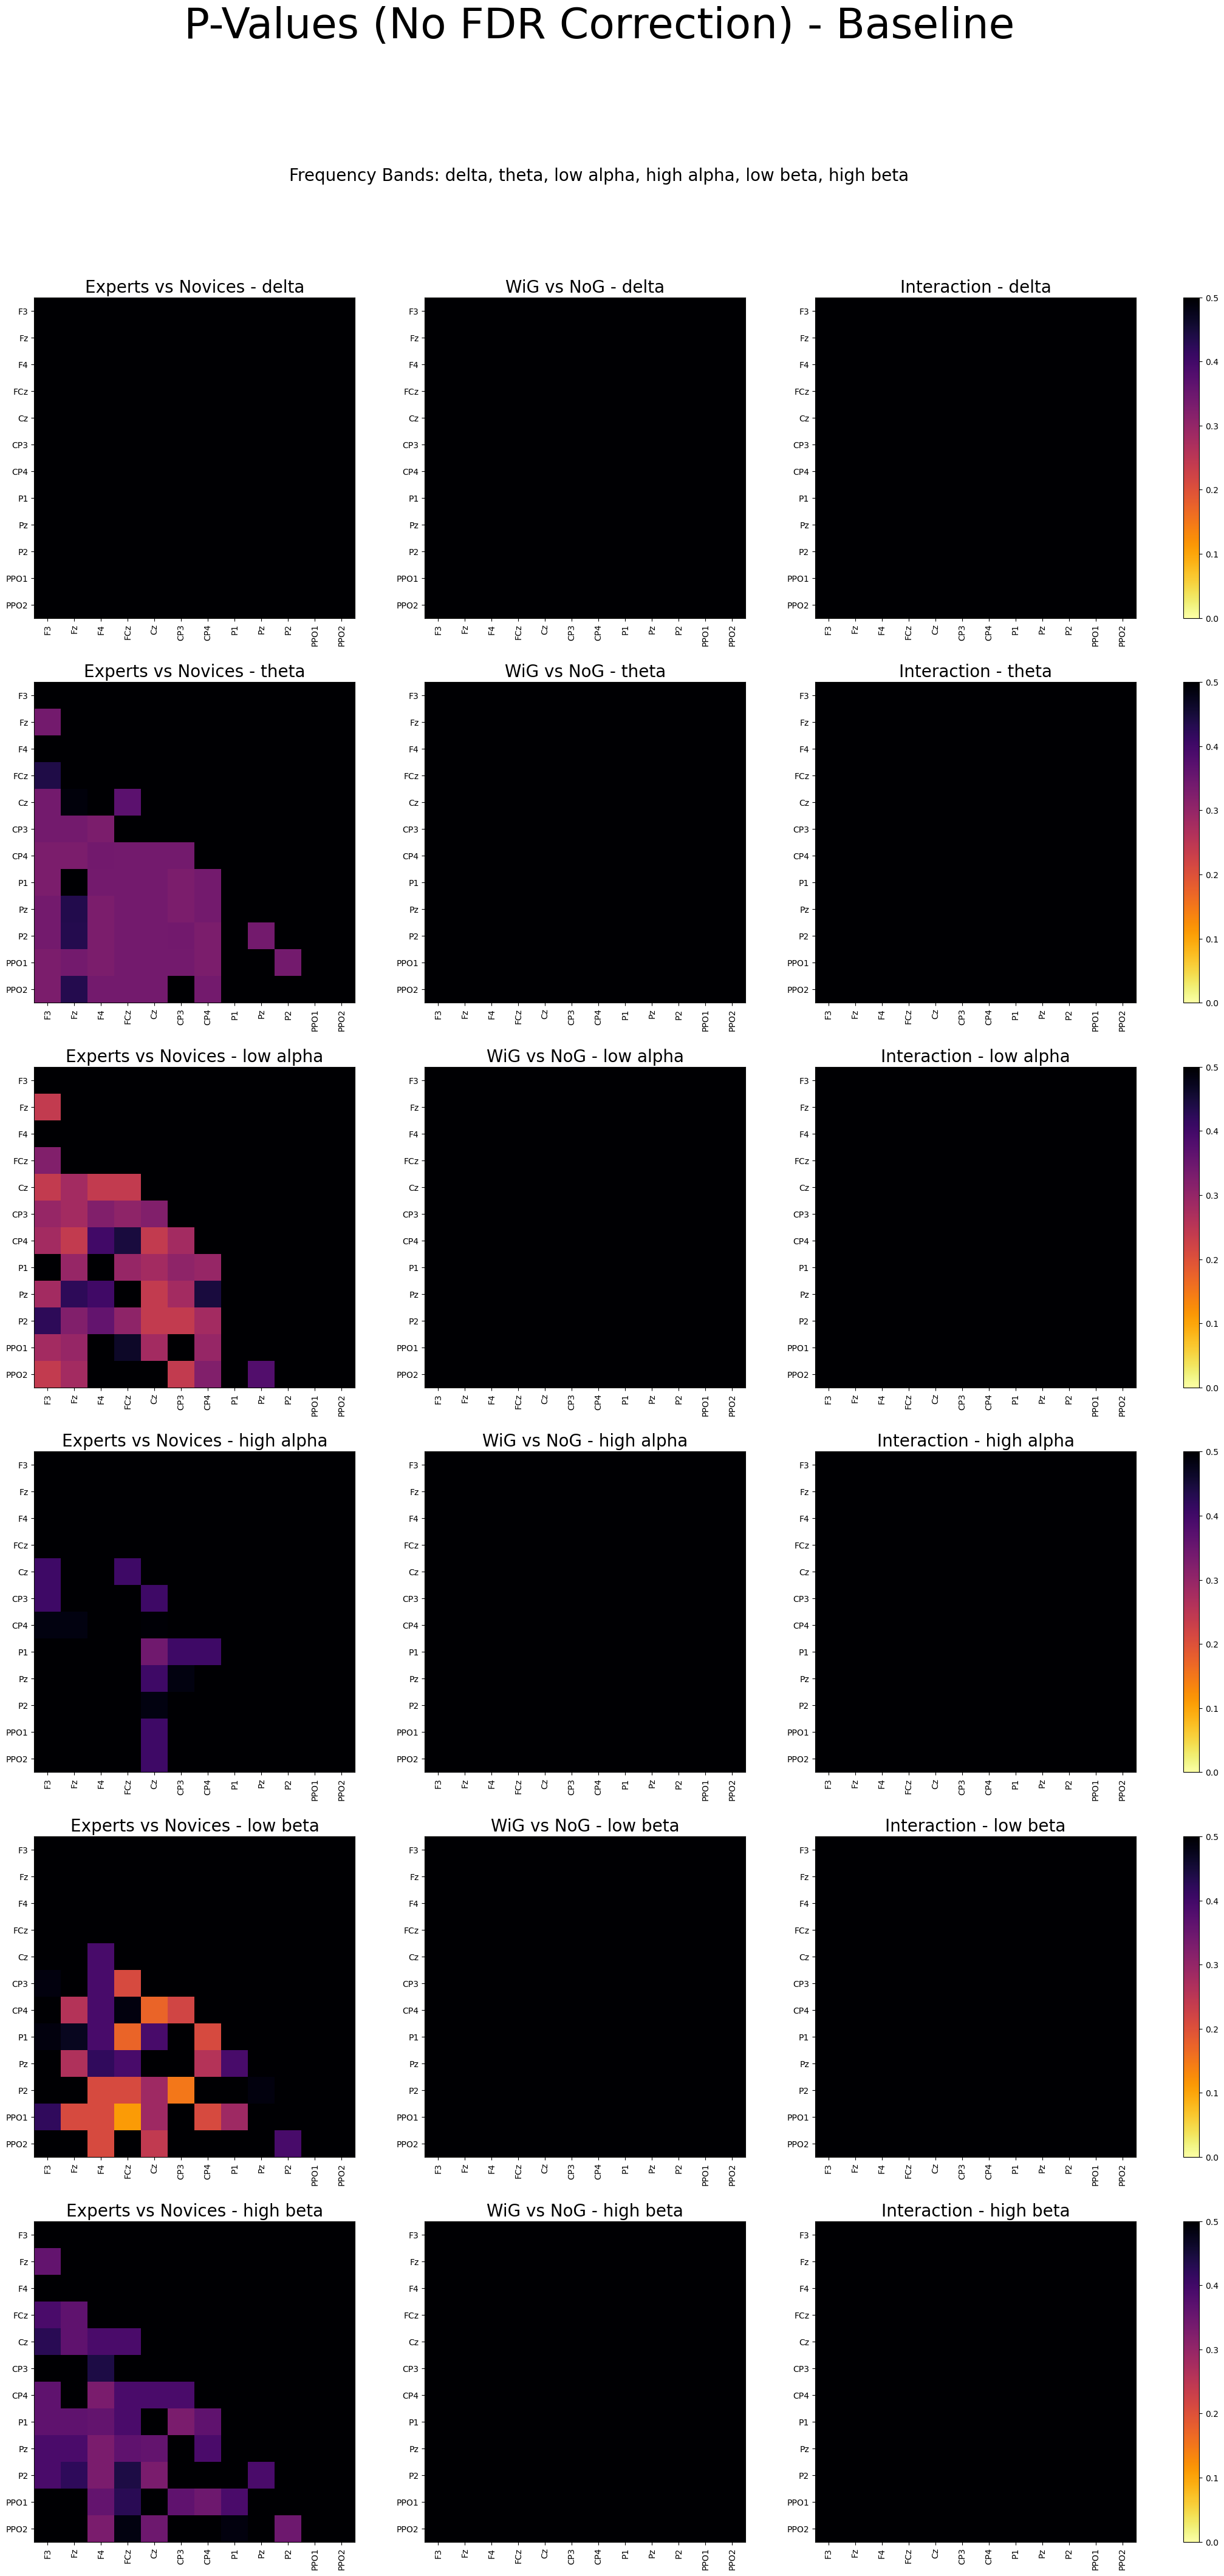

In [5]:
# Store lists of p-values with one entry for each frequency band
bl_group_ps_fdr_corr = []
bl_condition_ps_fdr_corr = []
bl_interaction_ps_fdr_corr = []
bl_n2_condition = []

# Iterate through bl frequency bands and run ANOVA tests for each
for freq in frequency_bands:
    # Define Group A as experts and Group B as novices
    # Define Condition 1 as WiG and Condition 2 as NoG
    group_a_condition_1 = dataset.get_frequency_average("expert", "BL", "WiG", freq)
    group_a_condition_2 = dataset.get_frequency_average("expert", "BL", "NoG", freq)

    group_b_condition_1 = dataset.get_frequency_average("novice", "BL", "WiG", freq)
    group_b_condition_2 = dataset.get_frequency_average("novice", "BL", "NoG", freq)

    # Run FDR Corrected Mixed ANOVA test
    p_values_group, p_values_condition, p_values_interaction, n2_condition = run_mixed_anova(group_a_condition_1, group_a_condition_2, group_b_condition_1, group_b_condition_2, fdr_correct=True)

    # Store p-values
    bl_group_ps_fdr_corr.append(p_values_group)
    bl_condition_ps_fdr_corr.append(p_values_condition)
    bl_interaction_ps_fdr_corr.append(p_values_interaction)

    # Store effect size for condition
    bl_n2_condition.append(n2_condition)


# Plot p-values fro group, condition, and interaction across all frequency bands
plot_stacked_triple_ps(bl_group_ps_fdr_corr, bl_condition_ps_fdr_corr, bl_interaction_ps_fdr_corr, frequency_bands, dataset.electrode_names, title="P-Values (No FDR Correction) - Baseline", sub_title_1="Experts vs Novices", sub_title_2="WiG vs NoG", sub_title_3="Interaction", save_path=None)

Now do Demo data just without FDR correction

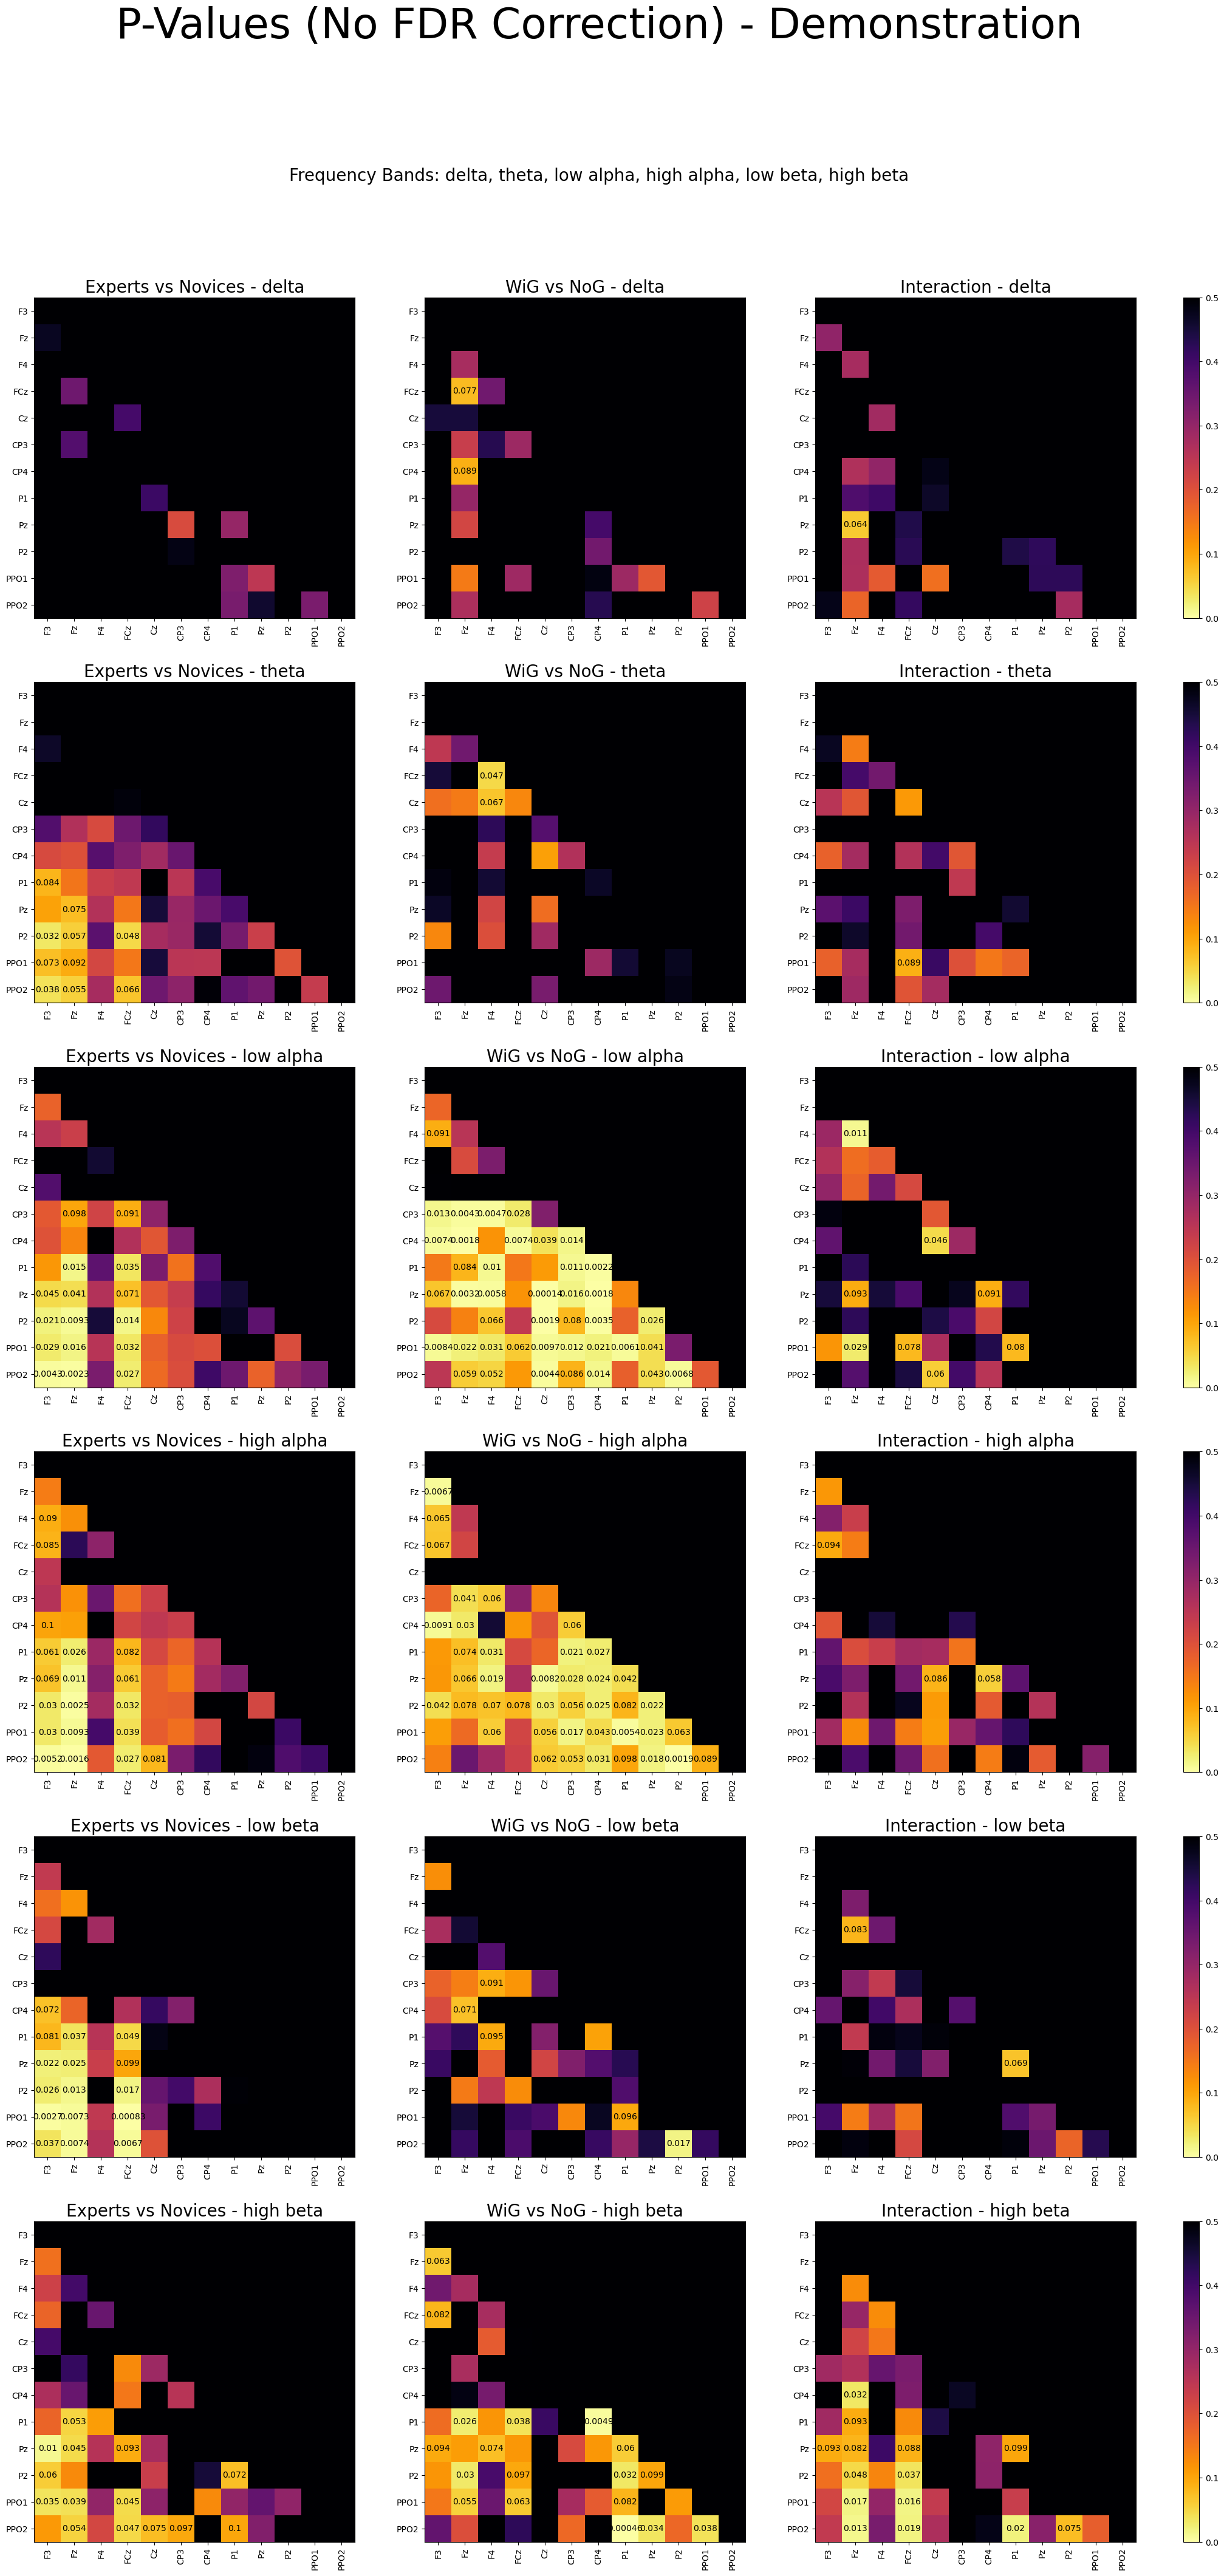

In [6]:
# Store lists of p-values with one entry for each frequency band
demo_group_ps_no_fdr_corr = []
demo_condition_ps_no_fdr_corr = []
demo_interaction_ps_no_fdr_corr = []


# Store list for effect size of condition
demo_n2_condition = []

# Iterate through bl frequency bands and run ANOVA tests for each
for freq in frequency_bands:
    # Define Group A as experts and Group B as novices
    # Define Condition 1 as WiG and Condition 2 as NoG
    group_a_condition_1 = dataset.get_frequency_average("expert", "demo", "WiG", freq)
    group_a_condition_2 = dataset.get_frequency_average("expert", "demo", "NoG", freq)

    group_b_condition_1 = dataset.get_frequency_average("novice", "demo", "WiG", freq)
    group_b_condition_2 = dataset.get_frequency_average("novice", "demo", "NoG", freq)

    # Run FDR Corrected Mixed ANOVA test
    p_values_group, p_values_condition, p_values_interaction, n2_condition = run_mixed_anova(group_a_condition_1, group_a_condition_2, group_b_condition_1, group_b_condition_2, fdr_correct=False)

    # Store p-values
    demo_group_ps_no_fdr_corr.append(p_values_group)
    demo_condition_ps_no_fdr_corr.append(p_values_condition)
    demo_interaction_ps_no_fdr_corr.append(p_values_interaction)

    # Store effect size for condition
    demo_n2_condition.append(n2_condition)


# Plot p-values fro group, condition, and interaction across all frequency bands
plot_stacked_triple_ps(demo_group_ps_no_fdr_corr, demo_condition_ps_no_fdr_corr, demo_interaction_ps_no_fdr_corr, frequency_bands, dataset.electrode_names, title="P-Values (No FDR Correction) - Demonstration", sub_title_1="Experts vs Novices", sub_title_2="WiG vs NoG", sub_title_3="Interaction", save_path=None)

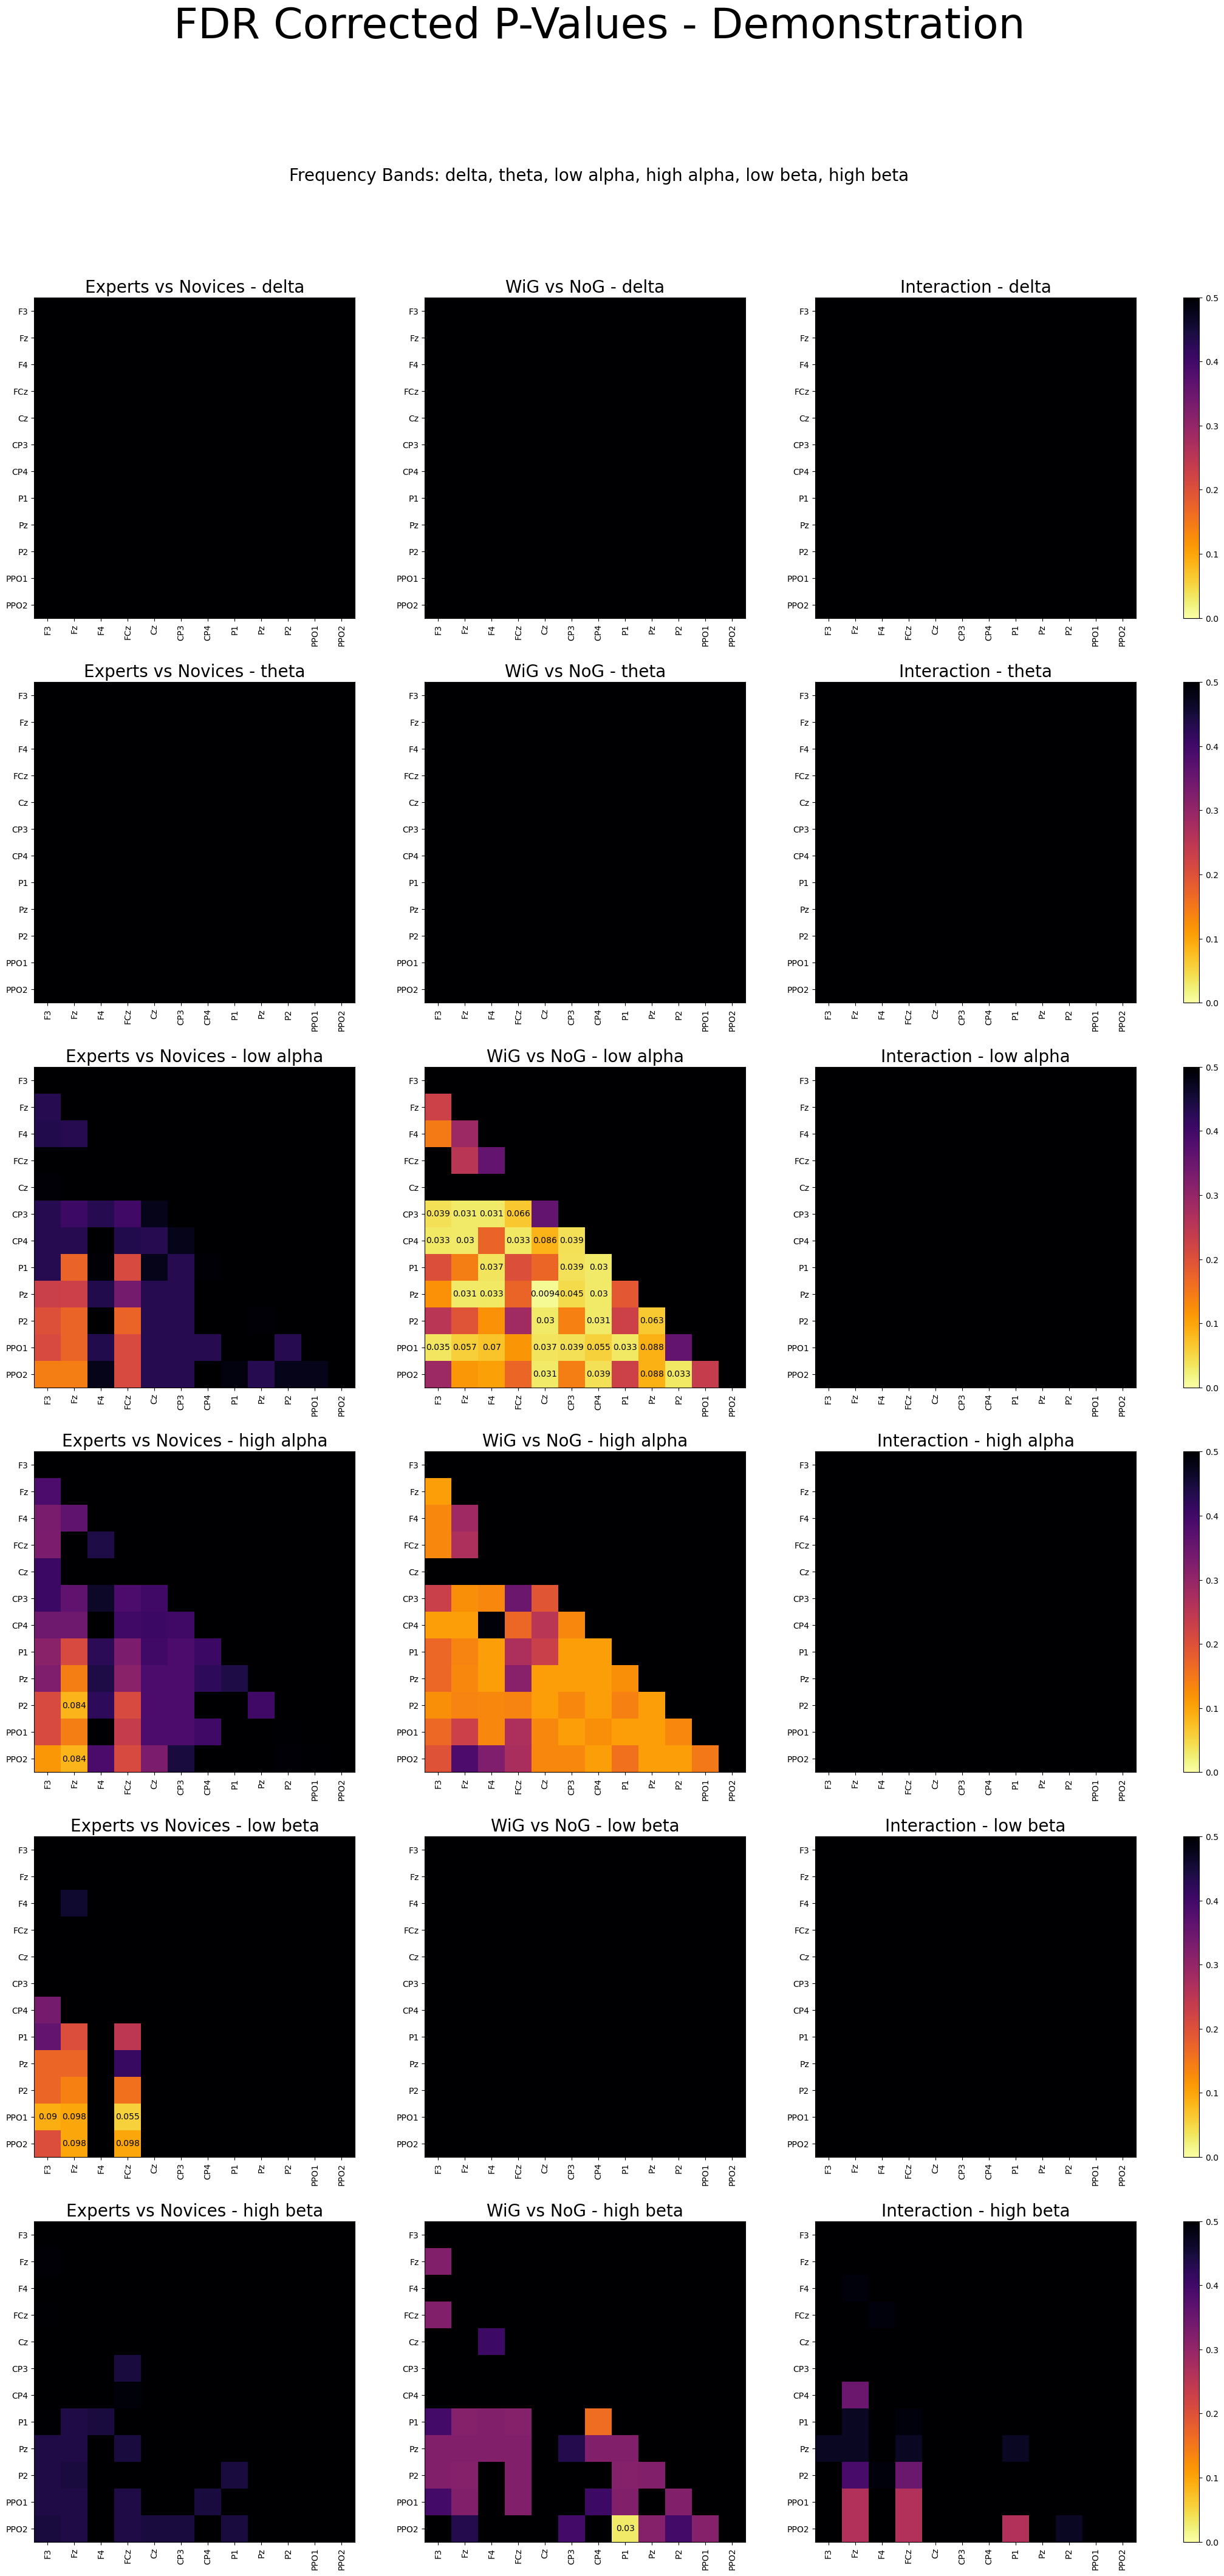

In [7]:
# Store lists of p-values with one entry for each frequency band
demo_group_ps_fdr_corr = []
demo_condition_ps_fdr_corr = []
demo_interaction_ps_fdr_corr = []


# Store list for effect size of condition
demo_n2_condition = []

# Iterate through bl frequency bands and run ANOVA tests for each
for freq in frequency_bands:
    # Define Group A as experts and Group B as novices
    # Define Condition 1 as WiG and Condition 2 as NoG
    group_a_condition_1 = dataset.get_frequency_average("expert", "demo", "WiG", freq)
    group_a_condition_2 = dataset.get_frequency_average("expert", "demo", "NoG", freq)

    group_b_condition_1 = dataset.get_frequency_average("novice", "demo", "WiG", freq)
    group_b_condition_2 = dataset.get_frequency_average("novice", "demo", "NoG", freq)

    # Run FDR Corrected Mixed ANOVA test
    p_values_group, p_values_condition, p_values_interaction, n2_condition = run_mixed_anova(group_a_condition_1, group_a_condition_2, group_b_condition_1, group_b_condition_2, fdr_correct=True)

    # Store p-values
    demo_group_ps_fdr_corr.append(p_values_group)
    demo_condition_ps_fdr_corr.append(p_values_condition)
    demo_interaction_ps_fdr_corr.append(p_values_interaction)

    # Store effect size for condition
    demo_n2_condition.append(n2_condition)


# Plot p-values fro group, condition, and interaction across all frequency bands
plot_stacked_triple_ps(demo_group_ps_fdr_corr, demo_condition_ps_fdr_corr, demo_interaction_ps_fdr_corr, frequency_bands, dataset.electrode_names, title="FDR Corrected P-Values - Demonstration", sub_title_1="Experts vs Novices", sub_title_2="WiG vs NoG", sub_title_3="Interaction", save_path=None)

## 3) Inspect Significant Low Alpha Connections

Isolate low alpha p-values and $\eta^2$ values. Filter by significance thresholds of 0.05 and 0.1 respectively.

Visualize the significant p-values for baseline and demo and $\eta^2$ values for demo.

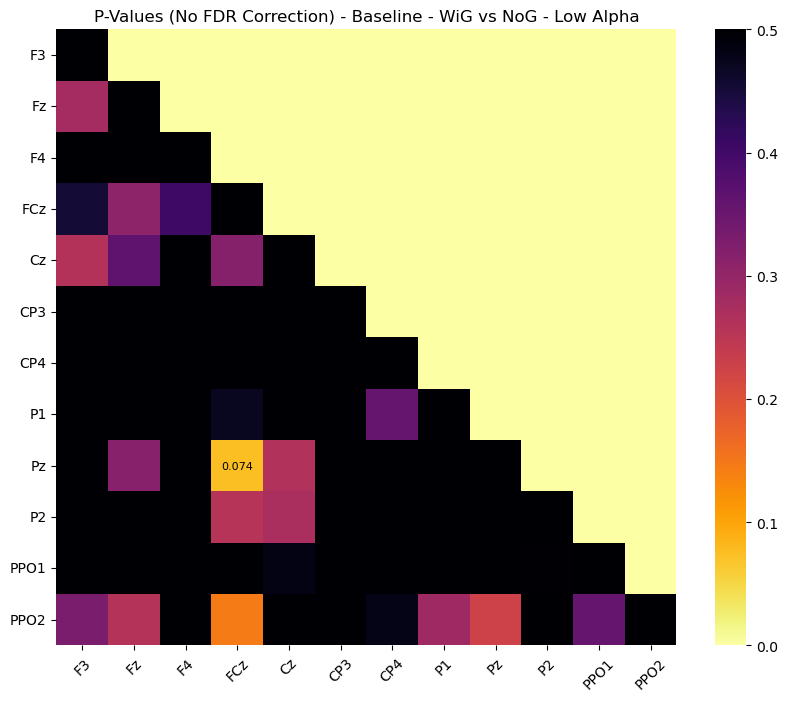

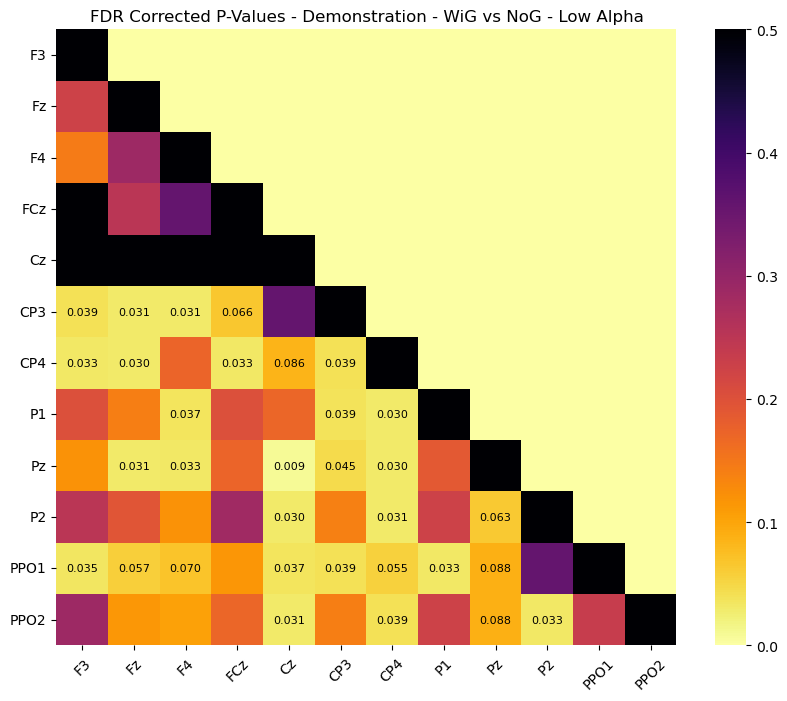

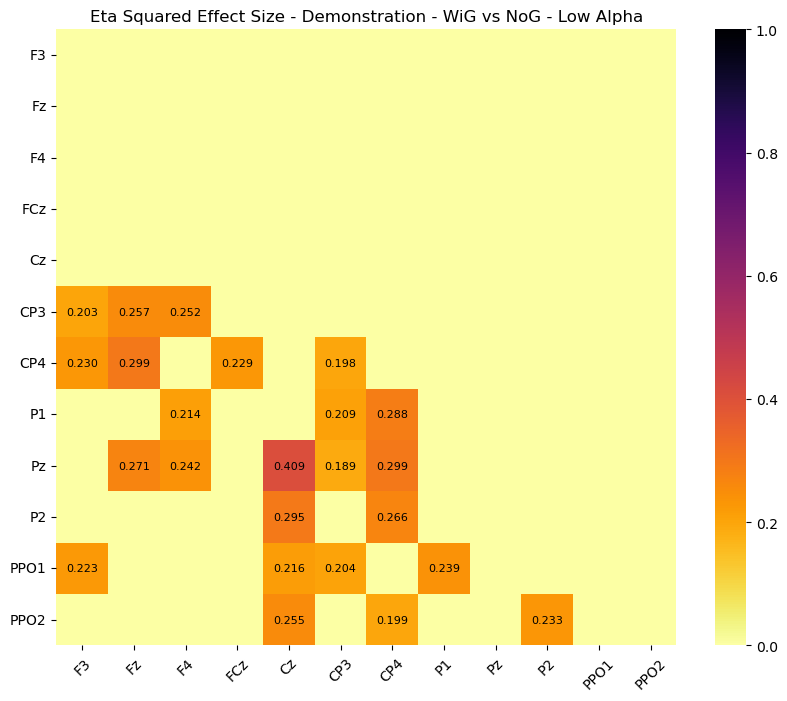

In [8]:
# Isolate the p-values and effect sizes for the low alpha frequency band
p_values_low_alpha_bl = bl_condition_ps_no_fdr_corr[2]
p_values_low_alpha_demo = demo_condition_ps_fdr_corr[2]
n2_low_alpha_demo = demo_n2_condition[2]

# Construct a significance mask for p-values less than 0.05 and effect sizes greater than 0.1
sig_mask_low_alpha_demo = (p_values_low_alpha_demo < 0.05) & (n2_low_alpha_demo > 0.1)

# Zero out non-significant values in the n2 array
n2_low_alpha_demo[~sig_mask_low_alpha_demo] = 0

plot_heatmap(p_values_low_alpha_bl, dataset.electrode_names, "P-Values (No FDR Correction) - Baseline - WiG vs NoG - Low Alpha", vmin=0, vmax=0.5, print_max=0.1)
plot_heatmap(p_values_low_alpha_demo, dataset.electrode_names, "FDR Corrected P-Values - Demonstration - WiG vs NoG - Low Alpha", vmin=0, vmax=0.5, print_max=0.1)
plot_heatmap(n2_low_alpha_demo, dataset.electrode_names, "Eta Squared Effect Size - Demonstration - WiG vs NoG - Low Alpha", vmin=0, vmax=1.0, print_min=0.1)

## 4) Inspect Directionality

Compute the difference in WiG mean and NoG mean for each subject.

Calculate the mean and standard deviation of these means.

In [9]:
# Further isolate Low Alpha data to study directionality of effect
expert_low_alpha_demo_wig = dataset.get_frequency_average("expert", "demo", "WiG", "low alpha")
novice_low_alpha_demo_wig = dataset.get_frequency_average("novice", "demo", "WiG", "low alpha")

expert_low_alpha_demo_nog = dataset.get_frequency_average("expert", "demo", "NoG", "low alpha")
novice_low_alpha_demo_nog = dataset.get_frequency_average("novice", "demo", "NoG", "low alpha")

expert_low_alpha_bl_wig = dataset.get_frequency_average("expert", "BL", "WiG", "low alpha")
novice_low_alpha_bl_wig = dataset.get_frequency_average("novice", "BL", "WiG", "low alpha")

expert_low_alpha_bl_nog = dataset.get_frequency_average("expert", "BL", "NoG", "low alpha")
novice_low_alpha_bl_nog = dataset.get_frequency_average("novice", "BL", "NoG", "low alpha")

# Combine experts and novices to compute mean difference
all_low_alpha_bl_nog = np.concatenate((expert_low_alpha_bl_nog, novice_low_alpha_bl_nog))
all_low_alpha_bl_wig = np.concatenate((expert_low_alpha_bl_wig, novice_low_alpha_bl_wig))

all_low_alpha_demo_nog = np.concatenate((expert_low_alpha_demo_nog, novice_low_alpha_demo_nog))
all_low_alpha_demo_wig = np.concatenate((expert_low_alpha_demo_wig, novice_low_alpha_demo_wig))

all_low_alpha_bl_diff = all_low_alpha_bl_wig - all_low_alpha_bl_nog
all_low_alpha_demo_diff = all_low_alpha_demo_wig - all_low_alpha_demo_nog

all_low_alpha_bl_mean_diff = np.mean(all_low_alpha_bl_diff, axis=0)
all_low_alpha_demo_mean_diff = np.mean(all_low_alpha_demo_diff, axis=0)

all_low_alpha_bl_std_diff = np.std(all_low_alpha_bl_diff, axis=0)
all_low_alpha_demo_std_diff = np.std(all_low_alpha_demo_diff, axis=0)

## 5) Generate LaTeX Table of Results

In [10]:
data_dict = defaultdict(list)

# Isolate significant connections and build the dataframe
sig_connections = []
for i in range(sig_mask_low_alpha_demo.shape[0]):
    for j in range(sig_mask_low_alpha_demo.shape[1]):
        if sig_mask_low_alpha_demo[i, j]:
            sig_connections.append((dataset.electrode_names[i], dataset.electrode_names[j]))
            data_dict["Electrode Pair"].append(dataset.electrode_names[i] + ", " + dataset.electrode_names[j])
            data_dict["P-Value (FDR Adj.)"].append(p_values_low_alpha_demo[i, j].round(3))
            data_dict["$\eta^2$ Effect Size"].append(n2_low_alpha_demo[i, j].round(3))
            data_dict["Explanation WiG-NoG Mean (std)"].append(f'{all_low_alpha_demo_mean_diff[i, j].round(3)} ({all_low_alpha_demo_std_diff[i,j].round(3)})')
            data_dict["P-Value in Baseline (not FDR Adj.)"].append(p_values_low_alpha_bl[i, j].round(3))
            
       
df = pd.DataFrame(data_dict)
df = df.sort_values(by="P-Value (FDR Adj.)", ascending=True)
df = df.reset_index(drop=True)
sorted_data_dict = df.to_dict(orient="list")
latex_table_str = dict_to_latex_table(sorted_data_dict, col_width="2.0cm", caption="Condition Results for the Low Alpha Frequency band")

# Save to text file if not in Colab
if not IN_COLAB:
    output_path = "paper/tables/significant_connectivity.txt"
    with open(output_path, "w") as f:
        f.write(latex_table_str)

print(latex_table_str)

\begin{table}[h!]
  \small
  \centering
  \caption{Condition Results for the Low Alpha Frequency band}
  \label{table:main}
  \begin{tabular}{|p{2.0cm}|p{2.0cm}|p{2.0cm}|p{2.0cm}|p{2.0cm}|}
    \hline
    Electrode Pair & P-Value (FDR Adj.) & $\eta^2$ Effect Size & Explanation WiG-NoG Mean (std) & P-Value in Baseline (not FDR Adj.) \\ \hline
    Pz, Cz & 0.009 & 0.409 & -0.038 (0.046) & 0.263 \\ 
    CP4, Fz & 0.03 & 0.299 & -0.034 (0.052) & 0.744 \\ 
    P2, Cz & 0.03 & 0.295 & -0.031 (0.049) & 0.271 \\ 
    Pz, CP4 & 0.03 & 0.299 & -0.041 (0.066) & 1.0 \\ 
    P1, CP4 & 0.03 & 0.288 & -0.035 (0.055) & 0.356 \\ 
    CP3, Fz & 0.031 & 0.257 & -0.035 (0.059) & 0.93 \\ 
    CP3, F4 & 0.031 & 0.252 & -0.038 (0.066) & 0.656 \\ 
    PPO2, Cz & 0.031 & 0.255 & -0.028 (0.052) & 0.862 \\ 
    P2, CP4 & 0.031 & 0.266 & -0.04 (0.068) & 0.685 \\ 
    Pz, Fz & 0.031 & 0.271 & -0.036 (0.063) & 0.316 \\ 
    Pz, F4 & 0.033 & 0.242 & -0.035 (0.062) & 0.709 \\ 
    PPO1, P1 & 0.033 & 0.239 & -0.051 (0

<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cw/gk4vzxmx11gdm6d2k0hsdnbh0000gn/T/ipykernel_47637/2957265326.py:11: SyntaxWarning: invalid escape sequence '\e'
  data_dict["$\eta^2$ Effect Size"].append(n2_low_alpha_demo[i, j].round(3))


In [11]:
# Display the data
df

,Electrode Pair,P-Value (FDR Adj.),$\eta^2$ Effect Size,Explanation WiG-NoG Mean (std),P-Value in Baseline (not FDR Adj.)
0,"Pz, Cz",0.009,0.409,-0.038 (0.046),0.263
1,"CP4, Fz",0.030,0.299,-0.034 (0.052),0.744
2,"P2, Cz",0.030,0.295,-0.031 (0.049),0.271
3,"Pz, CP4",0.030,0.299,-0.041 (0.066),1.000
4,"P1, CP4",0.030,0.288,-0.035 (0.055),0.356
5,"CP3, Fz",0.031,0.257,-0.035 (0.059),0.930
6,"CP3, F4",0.031,0.252,-0.038 (0.066),0.656
7,"PPO2, Cz",0.031,0.255,-0.028 (0.052),0.862
8,"P2, CP4",0.031,0.266,-0.04 (0.068),0.685
9,"Pz, Fz",0.031,0.271,-0.036 (0.063),0.316


## 6) Generate a Connectivity Diagram

{'Fp1': (-0.029436700000000007, 0.08391710000000001), 'Fpz': (0.00011229999999999327, 0.088247), 'Fp2': (0.029872299999999997, 0.08489590000000001), 'AF7': (-0.05483969999999999, 0.0685722), 'AF3': (-0.0337007, 0.0768371), 'AFz': (0.0002312999999999912, 0.08077099999999998), 'AF4': (0.0357123, 0.07772589999999999), 'AF8': (0.055743299999999996, 0.0696568), 'F7': (-0.07026290000000002, 0.042474300000000006), 'F5': (-0.0644658, 0.04803530000000001), 'F3': (-0.050243800000000005, 0.0531112), 'F1': (-0.027495800000000004, 0.0569311), 'Fz': (0.000312199999999997, 0.05851200000000001), 'F2': (0.029514199999999994, 0.057601900000000004), 'F4': (0.05183619999999999, 0.05430479999999999), 'F6': (0.0679142, 0.0498297), 'F8': (0.0730431, 0.04442170000000001), 'FT9': (-0.08407590000000001, 0.014567300000000016), 'FT7': (-0.08077499999999999, 0.014120300000000007), 'FC5': (-0.0772149, 0.018643299999999988), 'FC3': (-0.06018189999999999, 0.0227162), 'FC1': (-0.034061900000000006, 0.02601109999999999

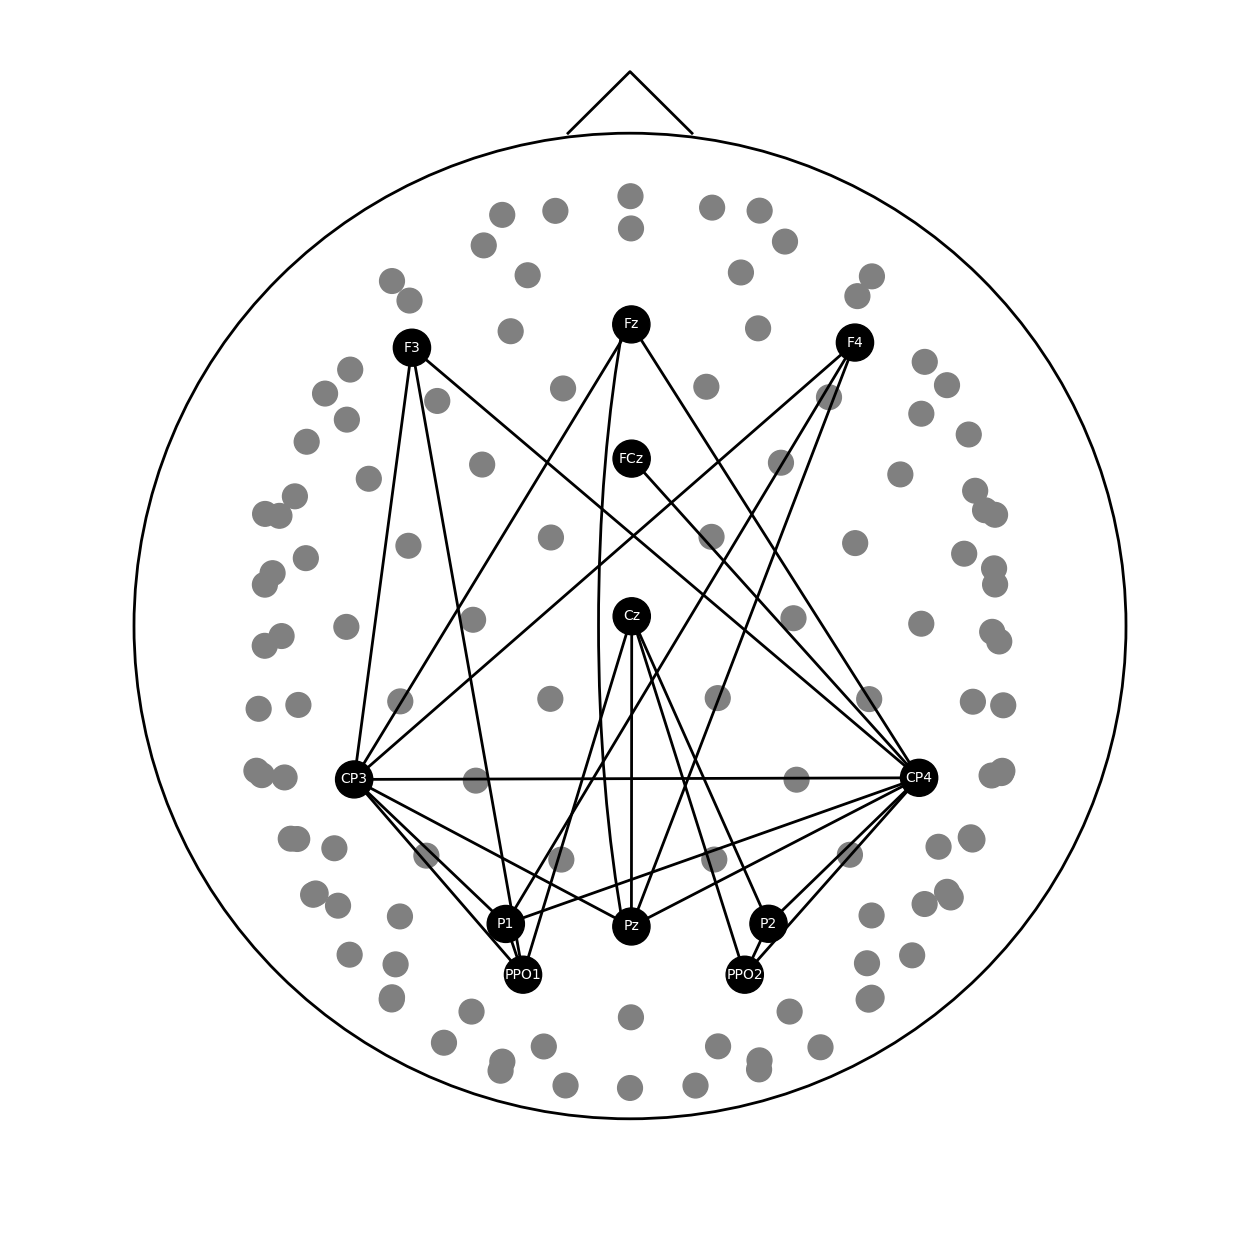

In [12]:
if not IN_COLAB:
    output_path = "paper/figures/connections.png"
    plot_connectivity(sig_connections, save_path=output_path)
else:
    montage_viz_path = os.path.join(root_dir, "data", "montage_viz_pos.npz")
    plot_connectivity(sig_connections, montage_viz_path=montage_viz_path)